# Introduction
The dataset contains Monte Carlo–simulated events from an atmospheric Cherenkov telescope, representing light patterns produced by high-energy particles interacting in the Earth’s atmosphere. Each event is described by 10 numerical features (Hillas parameters) that characterize the shape and intensity of the recorded shower image.

The goal is a binary classification task — to distinguish gamma-ray events (signal) from hadronic cosmic-ray events (background) based on these geometric and brightness features.

Data set Link: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

# Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('/Users/venkatchandan/Desktop/ML_Projects/CosmicClassifier/magic+gamma+telescope/magic04.data')
df.head(5)

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [4]:
df.columns

Index(['28.7967', '16.0021', '2.6449', '0.3918', '0.1982', '27.7004', '22.011',
       '-8.2027', '40.092', '81.8828', 'g'],
      dtype='object')

Looks Like the Dataset has no column headers and we have to manually enter the column headers from the Dataset Link. There are 11 column headers namely:

| Variable Name | Role    | Type       | Description                                                      | Units | Missing Values |
| ------------- | ------- | ---------- | ---------------------------------------------------------------- | ----- | -------------- |
| fLength       | Feature | Continuous | Major axis of ellipse                                            | mm    | No             |
| fWidth        | Feature | Continuous | Minor axis of ellipse                                            | mm    | No             |
| fSize         | Feature | Continuous | 10-log of sum of content of all pixels                           | #phot | No             |
| fConc         | Feature | Continuous | Ratio of sum of two highest pixels over fSize                    | —     | No             |
| fConc1        | Feature | Continuous | Ratio of highest pixel over fSize                                | —     | No             |
| fAsym         | Feature | Continuous | Distance from highest pixel to center, projected onto major axis | —     | No             |
| fM3Long       | Feature | Continuous | 3rd root of third moment along major axis                        | mm    | No             |
| fM3Trans      | Feature | Continuous | 3rd root of third moment along minor axis                        | mm    | No             |
| fAlpha        | Feature | Continuous | Angle of major axis with vector to origin                        | deg   | No             |
| fDist         | Feature | Continuous | Distance from origin to center of ellipse                        | mm    | No             |
| class         | Target  | Binary     | gamma (signal), hadron (background)                              | -     | No             | 


In [5]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df1 = pd.read_csv('/Users/venkatchandan/Desktop/ML_Projects/CosmicClassifier/magic+gamma+telescope/magic04.data',names = cols)
df1.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df1['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [7]:
df1.shape

(19020, 11)

The class column has two values namely g and h. We convert them to 1's and 0's as our computer cant understand Language.
We can convert that into 1's and 0's using various methods
```bash 
1. data['class'] = data['class'].map({'g': 1, 'h': 0})
2. data['class'] = data['class'].replace({'g': 1, 'h': 0})
3. from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['class'] = le.fit_transform(data['class'])
4. data['class'] = np.where(data['class'] == 'g', 1, 0)
```

We are gonna use the most simplest of all



In [8]:
df1['class']= (df1['class'] == 'g').astype(int)

In [9]:
df1.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [10]:
df1['class'].value_counts()

class
1    12332
0     6688
Name: count, dtype: int64

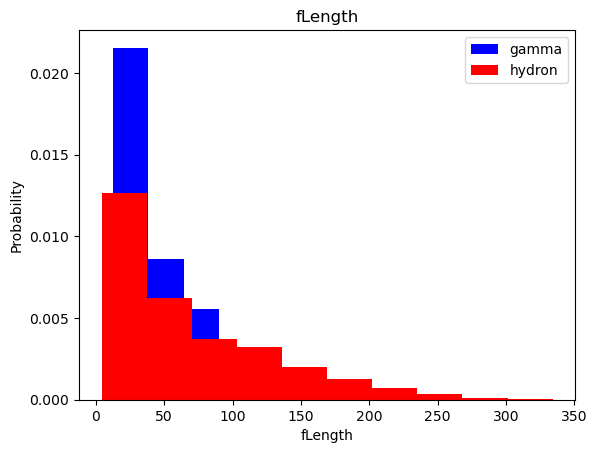

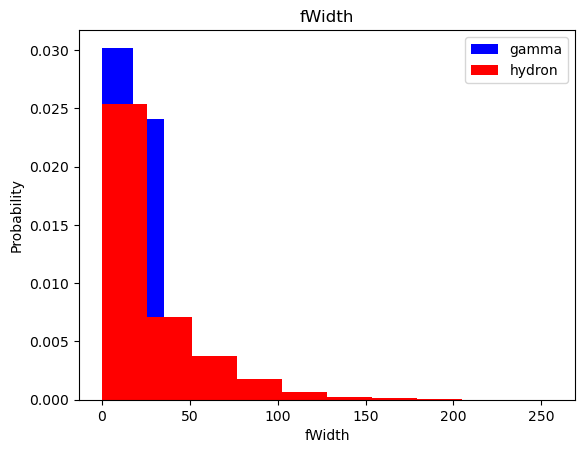

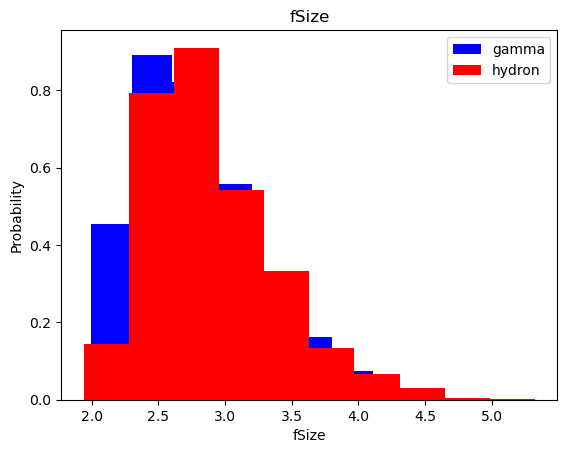

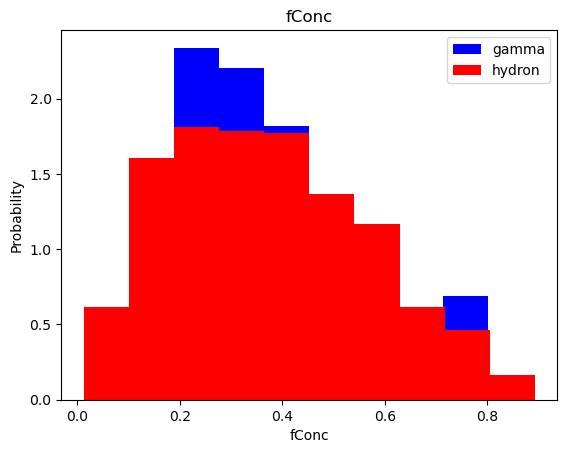

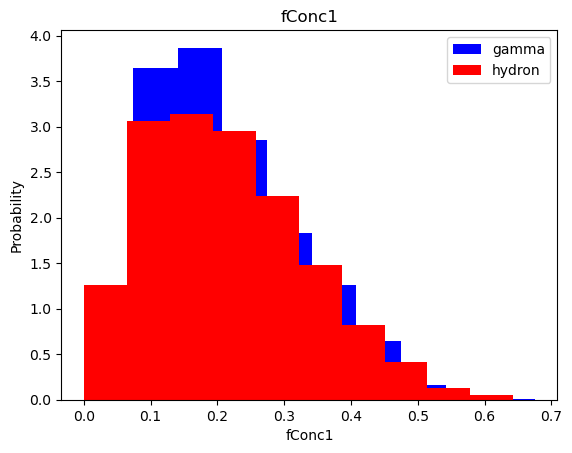

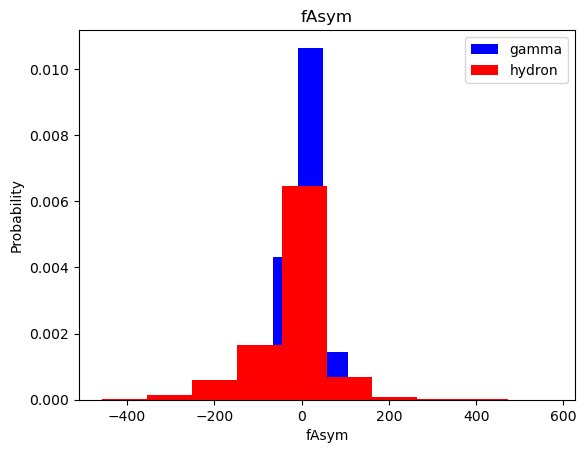

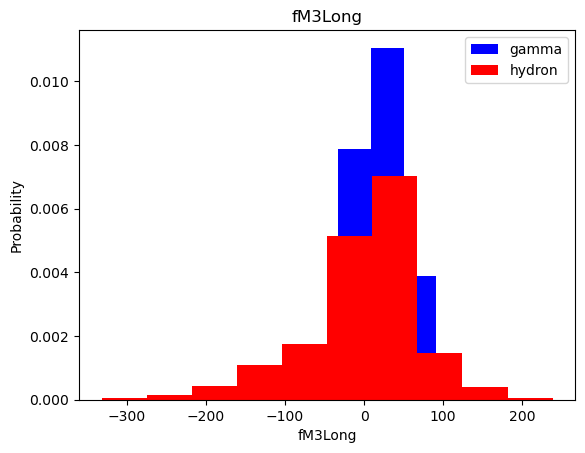

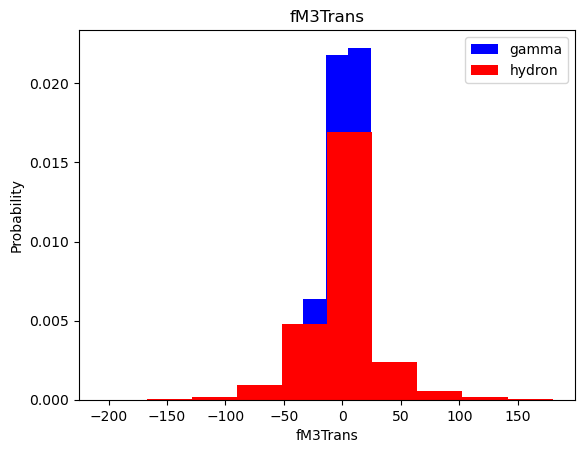

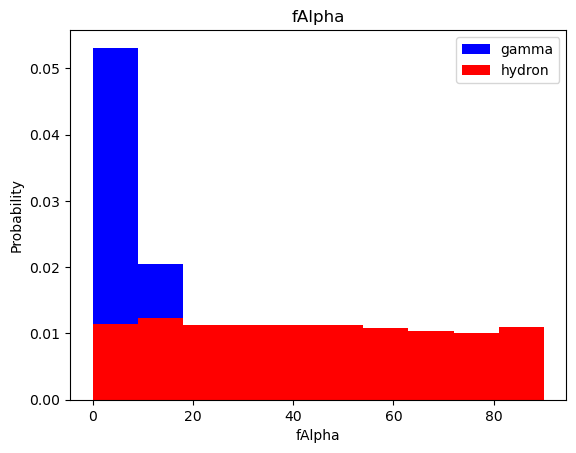

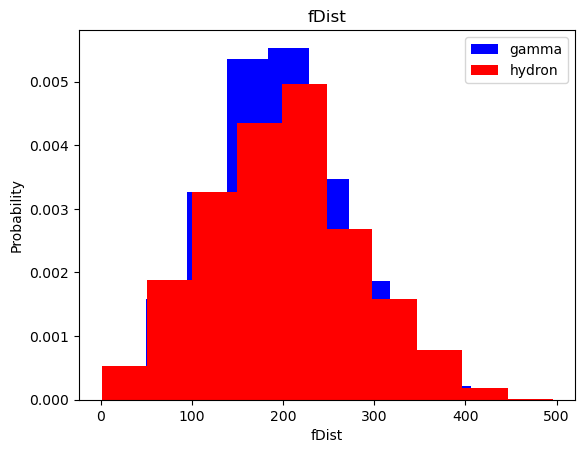

In [11]:

for i in cols[:-1]:
    
    plt.hist(df1[df1['class']==1][i],color='blue',label = 'gamma',density=True)
    plt.hist(df1[df1['class']==0][i],color='red',label = 'hydron',density=True)
    plt.title(i)
    plt.ylabel('Probability')
    plt.xlabel(i)
    plt.legend()
    plt.show()

# Pre-Processing
#### Observations:

1. The data is skewed in the Favour of Target = 'gamma'. Probably need to normalize that
2. The scale of the Dataframe of every column is very skewed which can cause problem. So we need to scale that.
3. From the Graphs above, few observations can be made.


#### Next Steps:

1. We will be dividing the Data set into Training, Validation and Testing.( 0-60, 60-80, 80-100)
2. Seperate Input variables and Output Variables
3. Scale all the columns using StandardScaler()


##### 1. Train, Validation, Test Set

In [12]:
train, valid, test = np.split(df1.sample(frac = 1),[int(0.6*len(df1)),int(0.8*len(df1))])

# Could have also been done thru train-test library


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


##### 2. Separating Input and Output Features and 3. Scaling

In [13]:
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    data = np.hstack((X,np.reshape(y,(-1,1))))

    return data, X,y


In [14]:
print("training Dataset")
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

print('Test Dataset')
print(len(test[test['class']==1]))
print(len(test[test['class']==0]))

print('Valid Dataset')
print(len(valid[valid['class']==1]))
print(len(valid[valid['class']==0]))

training Dataset
7445
3967
Test Dataset
2442
1362
Valid Dataset
2445
1359


### Further Observations:
1. As expected, there was a lot of imbalance in the training dataset itself. This could cause the model to biased.
2. We would not been solving the imbalance for test and valid dataset but only for training dataset. This is done cause we have to see how our Model Performs on new data that could be biased.

In [15]:
def scale_dataset_oversample(dataframe,oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    data = np.hstack((X,np.reshape(y,(-1,1))))

    return data, X,y

In [16]:
train, X_train, y_train = scale_dataset_oversample(train,oversample=True)
train.shape


(14890, 11)

In [17]:
print(sum(y_train == 1))
print(sum(y_train == 0))

7445
7445


In [18]:
# as we mentioned, we would not be oversampling our Test and valid dataset.
test, X_test, y_test = scale_dataset_oversample(test,oversample=False)
valid, X_valid, y_valid = scale_dataset_oversample(valid,oversample=False)

In [19]:
import joblib

joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(X_valid, "X_valid.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")
joblib.dump(y_valid, "y_valid.pkl")




['y_valid.pkl']